In [ ]:
import matplotlib.pyplot as plt

In [ ]:
import pandas as pd

sheet_names = pd.ExcelFile('lab1.xlsx').sheet_names

df1 = pd.read_excel('lab1.xlsx', sheet_name=sheet_names[0])
df2 = pd.read_excel('lab1.xlsx', sheet_name=sheet_names[1])
df3 = pd.read_excel('lab1.xlsx', sheet_name=sheet_names[2])
df4 = pd.read_excel('lab1.xlsx', sheet_name=sheet_names[3])
df5 = pd.read_excel('lab1.xlsx', sheet_name=sheet_names[4])
df6 = pd.read_excel('lab1.xlsx', sheet_name=sheet_names[5])


In [ ]:
df1 = df1.dropna()
df2 = df2.dropna()
df3 = df3.dropna()
df4 = df4.dropna()
df5 = df5.dropna()
df6 = df6.dropna()

In [ ]:
df1['Сумма'] = df1['Сумма'].str.replace(' ', '').str.replace(',', '.').astype(float)
df5['Сумма'] = df5['Сумма'].str.replace(' ', '').str.replace(',', '.').astype(float)

In [ ]:
df1.loc[37, 'Сумма'] = 120.0

df5.loc[38, 'Сумма'] = 800.0

df5.loc[45, 'Сумма'] = 2000.0

df5.loc[46, 'Сумма'] = 410.0

df5.loc[48, 'Сумма'] = 938.0

df5.loc[57, 'Сумма'] = 676.0


In [ ]:
df1['Дата'] = pd.to_datetime(df1['Дата'], format='%d.%m.%Y')

start_time = pd.Timestamp('12:00:00')
time_deltas = pd.to_timedelta(range(len(df1)), unit='h')

df1['Дата'] = df1['Дата'] + time_deltas
print(df6.head())

        Дата      Сумма
0 2010-06-03  14 987,50
1 2010-06-30   4 000,00
2 2010-07-14  10 540,00
3 2010-07-14   1 600,00
4 2010-07-19  12 000,00


In [ ]:
df3['Дата'] = pd.to_datetime(df3['Дата'], format='%d.%m.%Y')

start_time = pd.Timestamp('12:00:00')
time_deltas = pd.to_timedelta(range(len(df3)), unit='h')

df3['Дата'] = df3['Дата'] + time_deltas
print(df6.head())

        Дата      Сумма
0 2010-06-03  14 987,50
1 2010-06-30   4 000,00
2 2010-07-14  10 540,00
3 2010-07-14   1 600,00
4 2010-07-19  12 000,00


In [ ]:
df5['Дата'] = pd.to_datetime(df5['Дата'], format='%d.%m.%Y')

millisecond_deltas = pd.to_timedelta(range(0, len(df5) * 10, 10), unit='ms')

df5['Дата'] = df5['Дата'] + millisecond_deltas

In [ ]:
df6['Дата'] = pd.to_datetime(df6['Дата'], format='%d.%m.%Y')

start_time = pd.Timestamp('12:00:00')
time_deltas = pd.to_timedelta(range(len(df6)), unit='h')

df6['Дата'] = df6['Дата'] + time_deltas
print(df6.head())

                 Дата      Сумма
0 2010-06-03 00:00:00  14 987,50
1 2010-06-30 01:00:00   4 000,00
2 2010-07-14 02:00:00  10 540,00
3 2010-07-14 03:00:00   1 600,00
4 2010-07-19 04:00:00  12 000,00


In [ ]:
df1['Дата'] = pd.to_datetime(df1['Дата'], format='%d.%m.%Y %H:%M:%S')

df2['Дата'] = pd.to_datetime(df2['Дата'], format='%d.%m.%Y %H:%M:%S')

df2['Сумма'] = pd.to_numeric(df2['Сумма'].str.replace(' ', '').str.replace(',', '.'), errors='coerce')

df3['Дата'] = pd.to_datetime(df3['Дата'], format='%d.%m.%Y %H:%M:%S')

df3['Сумма'] = pd.to_numeric(df3['Сумма'].str.replace(' ', '').str.replace(',', '.'), errors='coerce')

df4['Дата'] = pd.to_datetime(df4['Дата'], format='%d.%m.%Y %H:%M:%S')

df4['Сумма'] = pd.to_numeric(df4['Сумма'].str.replace(' ', '').str.replace(',', '.'), errors='coerce')

df5['Дата'] = pd.to_datetime(df5['Дата'], format='%d.%m.%Y %H:%M:%S')

df6['Дата'] = pd.to_datetime(df6['Дата'], format='%d.%m.%Y %H:%M:%S')

df6['Сумма'] = pd.to_numeric(df6['Сумма'].str.replace(' ', '').str.replace(',', '.'), errors='coerce')

In [ ]:
CL = df1['Сумма'].mean()
UCL = CL + 3 * df1['Сумма'].std()
LCL = max(0, CL - 3 * df1['Сумма'].std())
print(CL)
print(UCL)
print(LCL)

15241.369565217392
53012.855996697406
0


In [ ]:
df1['Размах'] = df1['Сумма'].diff().abs()
RMean = df1['Размах'].mean()
WR = 3.267 * RMean
LR = 0

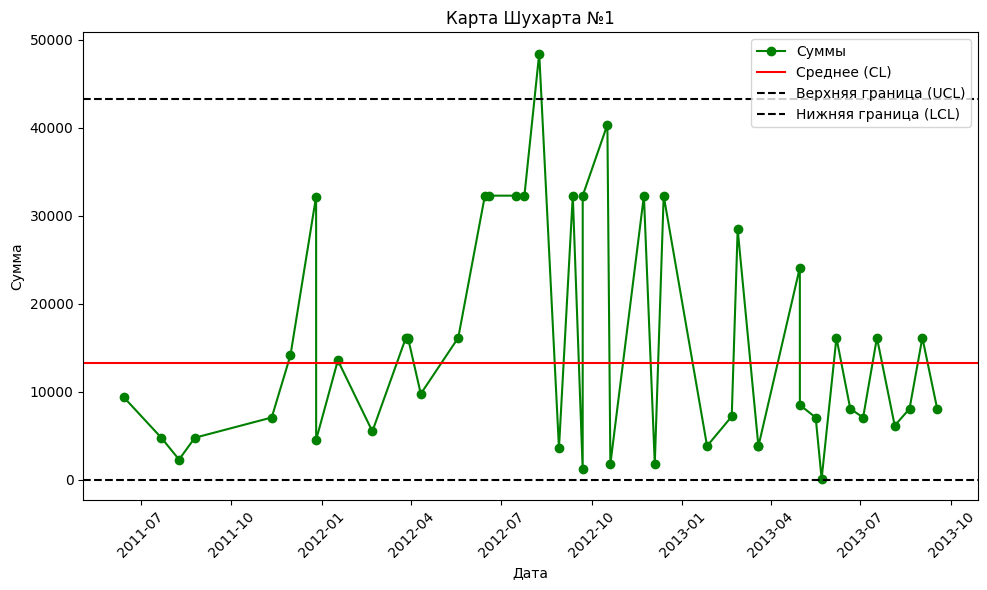

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(df1['Дата'], df1['Сумма'], marker='o', linestyle='-', color='g', label='Суммы')
plt.axhline(y=RMean, color='red', linestyle='-', label='Среднее (CL)')
plt.axhline(y=WR, color='black', linestyle='--', label='Верхняя граница (UCL)')
plt.axhline(y=LR, color='black', linestyle='--', label='Нижняя граница (LCL)')

plt.title('Карта Шухарта №1')
plt.xlabel('Дата')
plt.ylabel('Сумма')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('schuhart_map1.png')
plt.show()

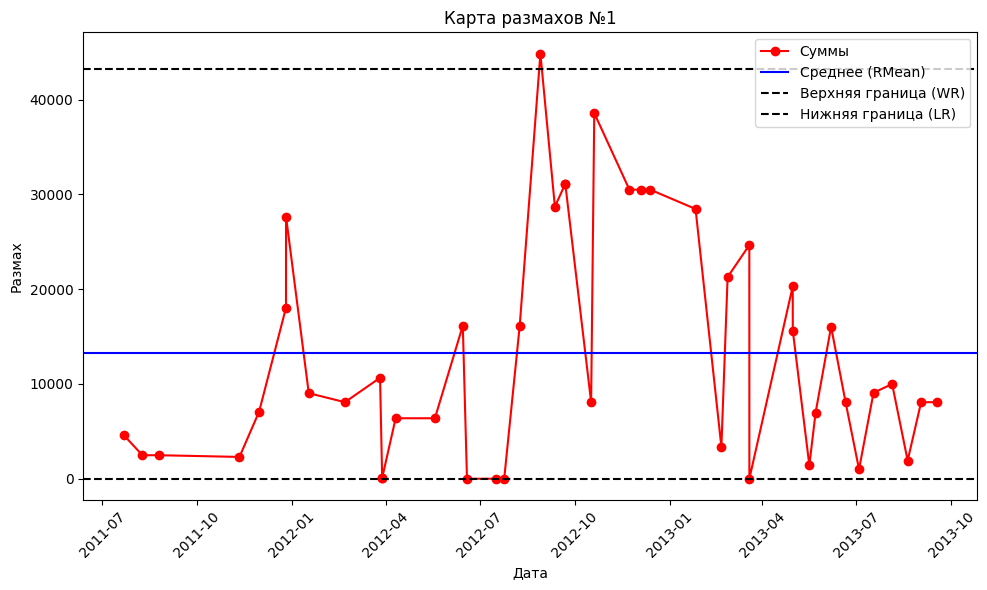

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(df1['Дата'], df1['Размах'], marker='o', linestyle='-', color='r', label='Суммы')
plt.axhline(y=RMean, color='blue', linestyle='-', label='Среднее (RMean)')
plt.axhline(y=WR, color='black', linestyle='--', label='Верхняя граница (WR)')
plt.axhline(y=LR, color='black', linestyle='--', label='Нижняя граница (LR)')

plt.title('Карта размахов №1')
plt.xlabel('Дата')
plt.ylabel('Размах')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('scope_map1.png')
plt.show()

In [ ]:
CL = df2['Сумма'].mean()
UCL = CL + 3 * df2['Сумма'].std()
LCL = max(0, CL - 3 * df2['Сумма'].std())

In [ ]:
df2['Размах'] = df2['Сумма'].diff().abs()
RMean = df2['Размах'].mean()
WR = 3.267 * RMean
LR = 0

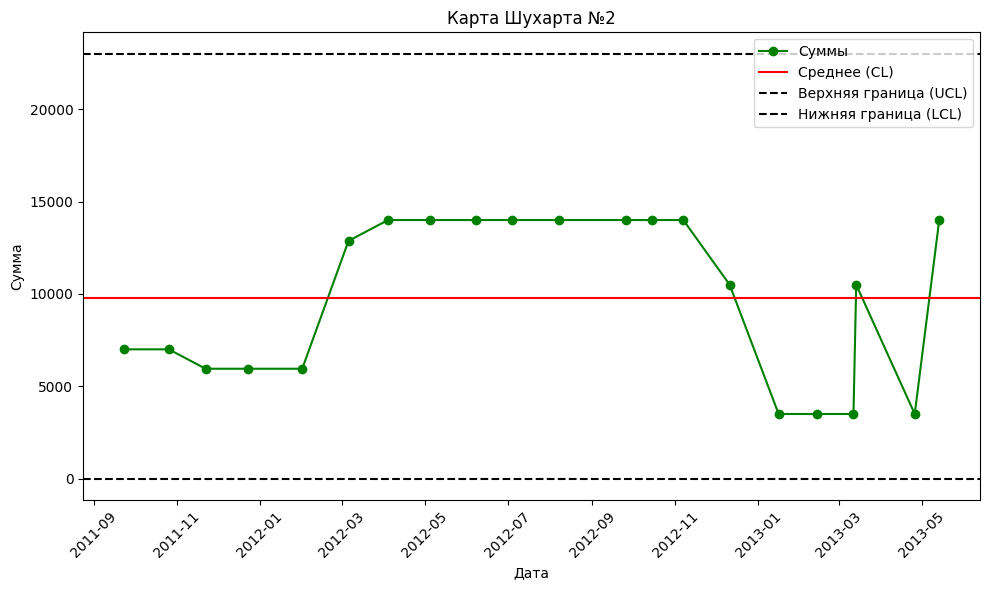

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(df2['Дата'], df2['Сумма'], marker='o', linestyle='-', color='g', label='Суммы')
plt.axhline(y=CL, color='red', linestyle='-', label='Среднее (CL)')
plt.axhline(y=UCL, color='black', linestyle='--', label='Верхняя граница (UCL)')
plt.axhline(y=LCL, color='black', linestyle='--', label='Нижняя граница (LCL)')

plt.title('Карта Шухарта №2')
plt.xlabel('Дата')
plt.ylabel('Сумма')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('schuhart_map2.png')
plt.show()

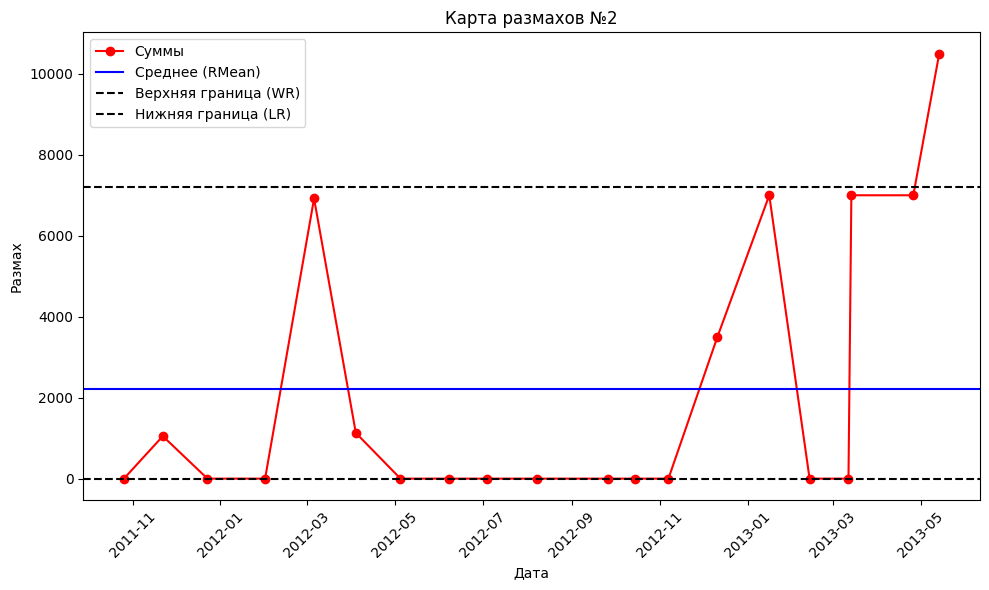

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(df2['Дата'], df2['Размах'], marker='o', linestyle='-', color='r', label='Суммы')
plt.axhline(y=RMean, color='blue', linestyle='-', label='Среднее (RMean)')
plt.axhline(y=WR, color='black', linestyle='--', label='Верхняя граница (WR)')
plt.axhline(y=LR, color='black', linestyle='--', label='Нижняя граница (LR)')

plt.title('Карта размахов №2')
plt.xlabel('Дата')
plt.ylabel('Размах')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('scope_map2.png')
plt.show()

In [ ]:
CL = df3['Сумма'].mean()
UCL = CL + 3 * df3['Сумма'].std()
LCL = CL - 3 * df3['Сумма'].std()

In [ ]:
df3['Размах'] = df3['Сумма'].diff().abs()
RMean = df3['Размах'].mean()
WR = 3.267 * RMean
LR = 0

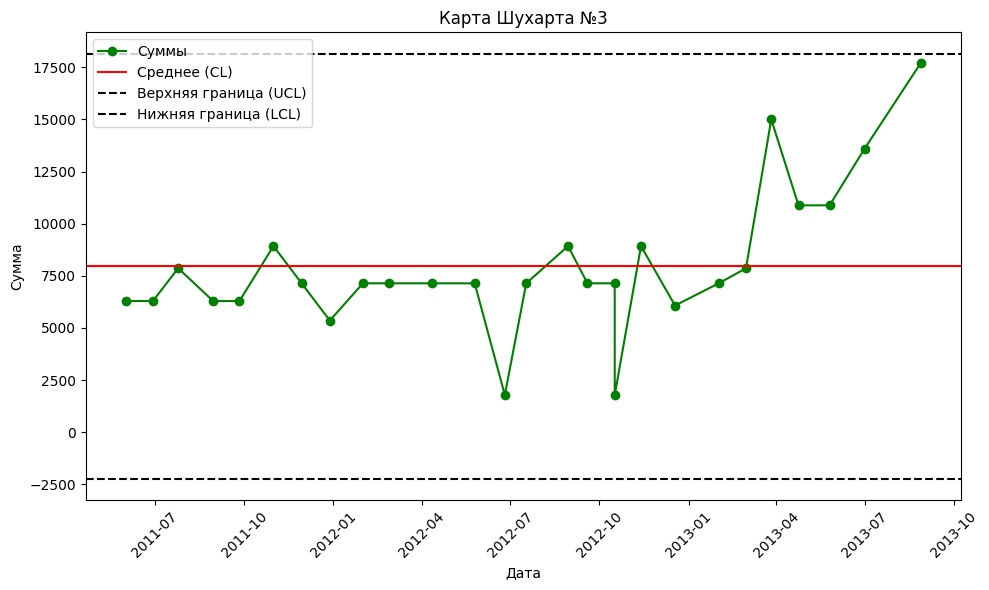

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(df3['Дата'], df3['Сумма'], marker='o', linestyle='-', color='g', label='Суммы')
plt.axhline(y=CL, color='red', linestyle='-', label='Среднее (CL)')
plt.axhline(y=UCL, color='black', linestyle='--', label='Верхняя граница (UCL)')
plt.axhline(y=LCL, color='black', linestyle='--', label='Нижняя граница (LCL)')

plt.title('Карта Шухарта №3')
plt.xlabel('Дата')
plt.ylabel('Сумма')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('schuhart_map3.png')
plt.show()

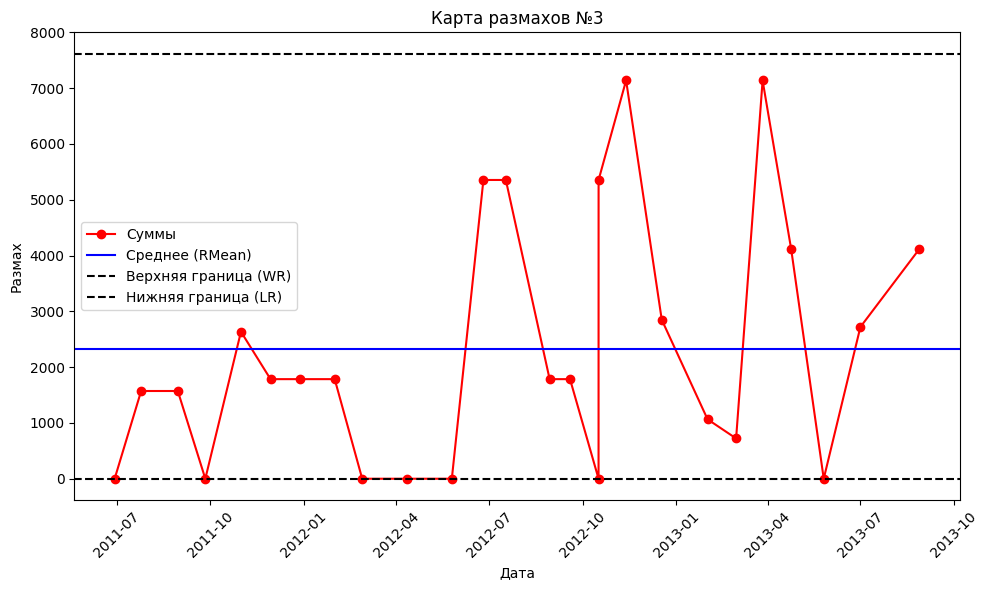

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(df3['Дата'], df3['Размах'], marker='o', linestyle='-', color='r', label='Суммы')
plt.axhline(y=RMean, color='blue', linestyle='-', label='Среднее (RMean)')
plt.axhline(y=WR, color='black', linestyle='--', label='Верхняя граница (WR)')
plt.axhline(y=LR, color='black', linestyle='--', label='Нижняя граница (LR)')

plt.title('Карта размахов №3')
plt.xlabel('Дата')
plt.ylabel('Размах')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('scope_map3.png')
plt.show()

In [ ]:
CL = df4['Сумма'].mean()
UCL = CL + 3 * df4['Сумма'].std()
LCL = CL - 3 * df4['Сумма'].std()

In [ ]:
df4['Размах'] = df4['Сумма'].diff().abs()
RMean = df4['Размах'].mean()
WR = 3.267 * RMean
LR = 0

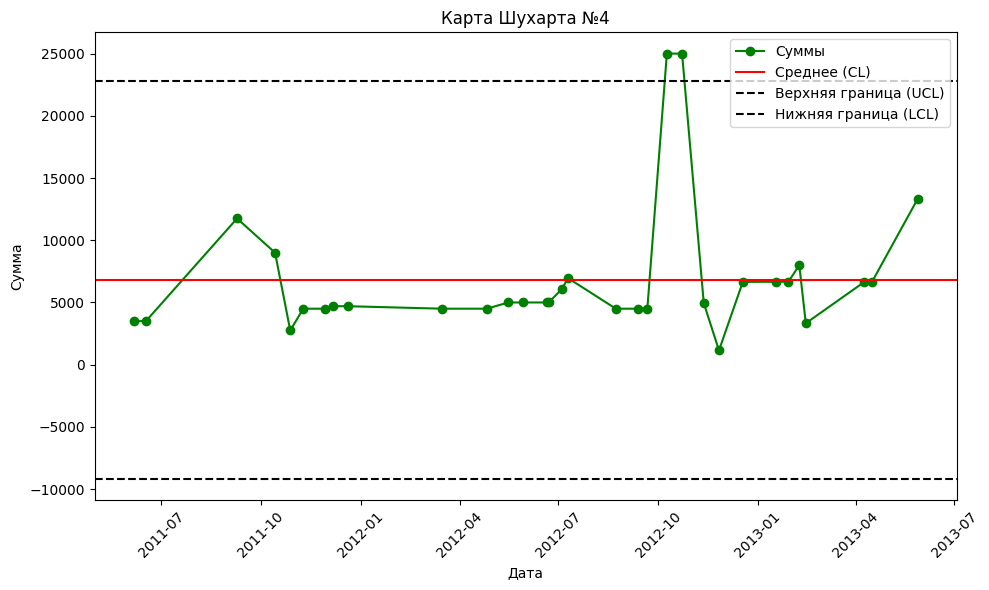

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(df4['Дата'], df4['Сумма'], marker='o', linestyle='-', color='g', label='Суммы')
plt.axhline(y=CL, color='red', linestyle='-', label='Среднее (CL)')
plt.axhline(y=UCL, color='black', linestyle='--', label='Верхняя граница (UCL)')
plt.axhline(y=LCL, color='black', linestyle='--', label='Нижняя граница (LCL)')

plt.title('Карта Шухарта №4')
plt.xlabel('Дата')
plt.ylabel('Сумма')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('schuhart_map4.png')
plt.show()

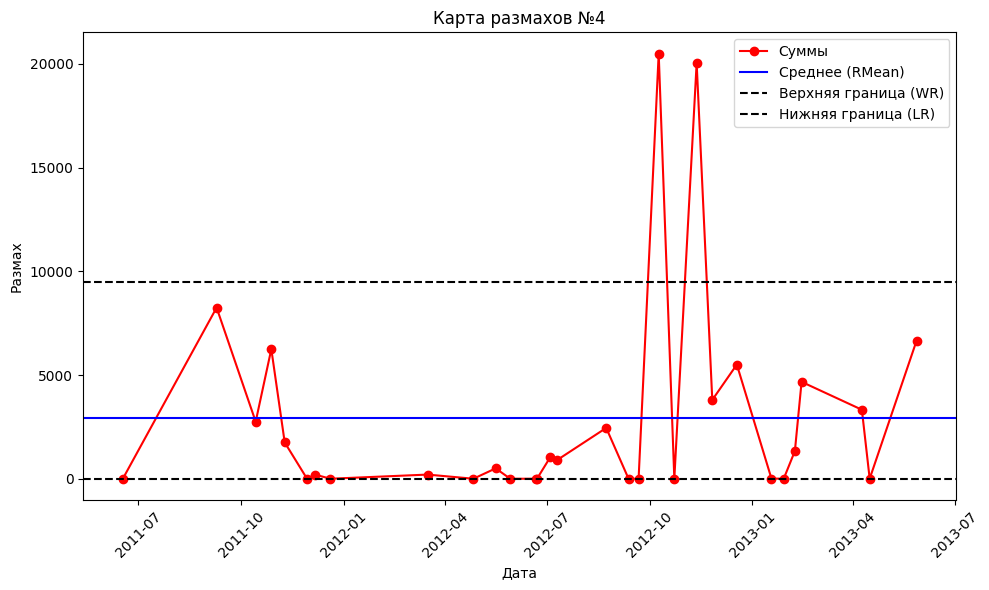

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(df4['Дата'], df4['Размах'], marker='o', linestyle='-', color='r', label='Суммы')
plt.axhline(y=RMean, color='blue', linestyle='-', label='Среднее (RMean)')
plt.axhline(y=WR, color='black', linestyle='--', label='Верхняя граница (WR)')
plt.axhline(y=LR, color='black', linestyle='--', label='Нижняя граница (LR)')

plt.title('Карта размахов №4')
plt.xlabel('Дата')
plt.ylabel('Размах')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('scope_map4.png')
plt.show()

In [ ]:
CL = df5['Сумма'].mean()
UCL = CL + 3 * df5['Сумма'].std()
LCL = CL - 3 * df5['Сумма'].std()

In [ ]:
df5['Размах'] = df5['Сумма'].diff().abs()
RMean = df5['Размах'].mean()
WR = 3.267 * RMean
LR = 0

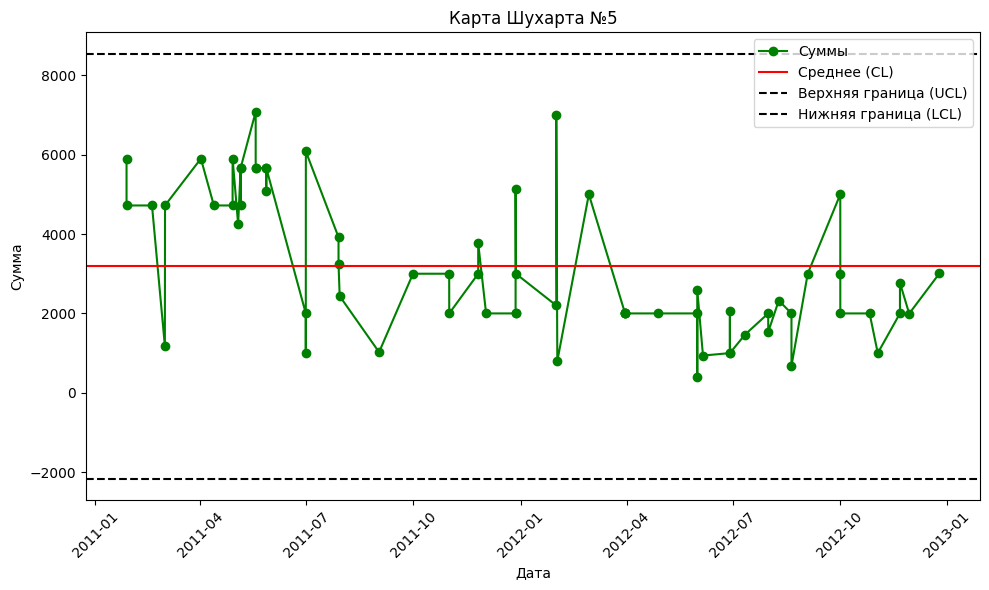

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(df5['Дата'], df5['Сумма'], marker='o', linestyle='-', color='g', label='Суммы')
plt.axhline(y=CL, color='red', linestyle='-', label='Среднее (CL)')
plt.axhline(y=UCL, color='black', linestyle='--', label='Верхняя граница (UCL)')
plt.axhline(y=LCL, color='black', linestyle='--', label='Нижняя граница (LCL)')

plt.title('Карта Шухарта №5')
plt.xlabel('Дата')
plt.ylabel('Сумма')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('schuhart_map5.png')
plt.show()

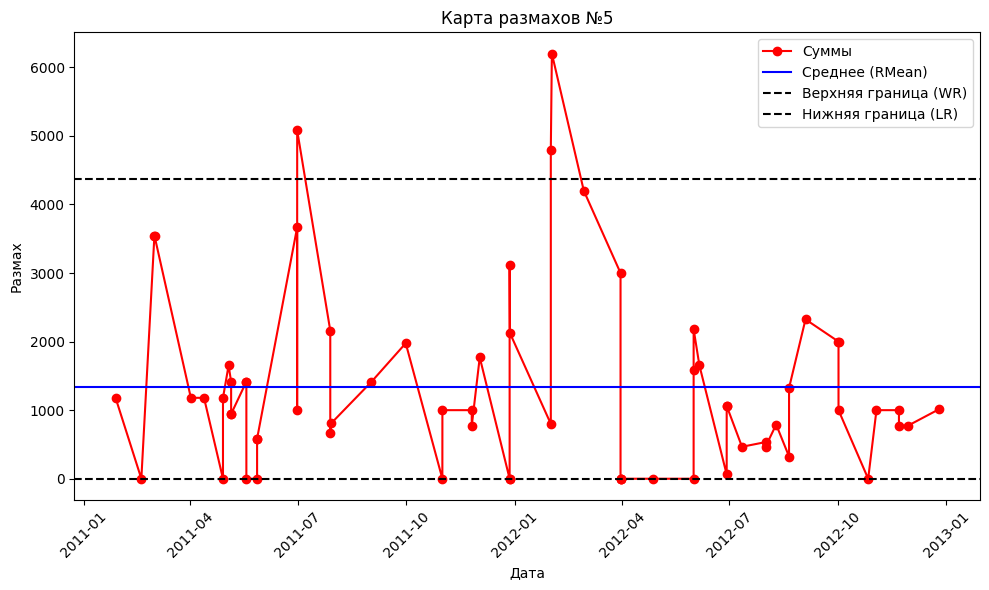

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(df5['Дата'], df5['Размах'], marker='o', linestyle='-', color='r', label='Суммы')
plt.axhline(y=RMean, color='blue', linestyle='-', label='Среднее (RMean)')
plt.axhline(y=WR, color='black', linestyle='--', label='Верхняя граница (WR)')
plt.axhline(y=LR, color='black', linestyle='--', label='Нижняя граница (LR)')

plt.title('Карта размахов №5')
plt.xlabel('Дата')
plt.ylabel('Размах')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('scope_map5.png')
plt.show()

In [ ]:
CL = df6['Сумма'].mean()
UCL = CL + 3 * df6['Сумма'].std()
LCL = CL - 3 * df6['Сумма'].std()

In [ ]:
df6['Размах'] = df6['Сумма'].diff().abs()
RMean = df6['Размах'].mean()
WR = 3.267 * RMean
LR = 0

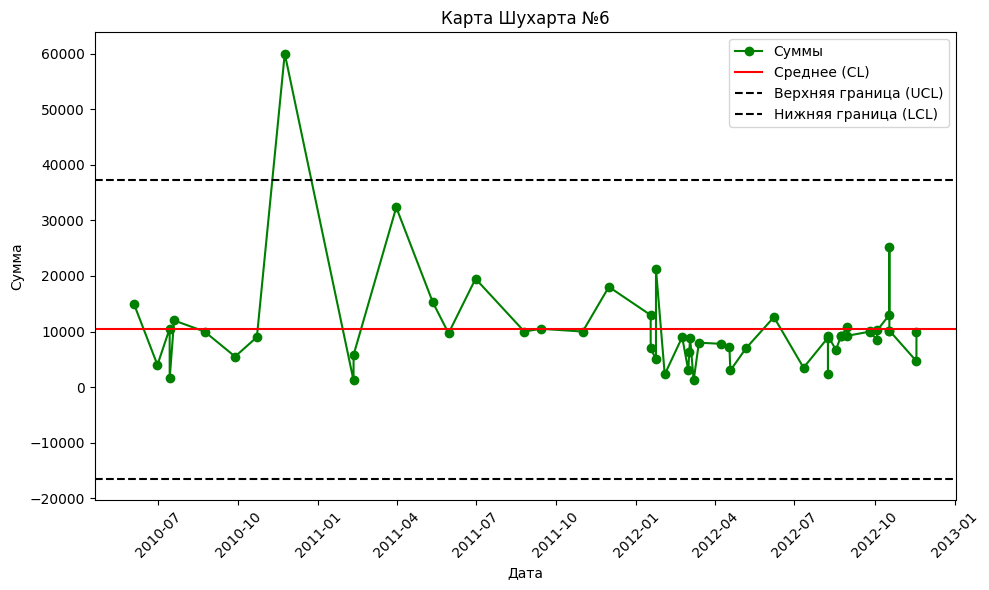

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(df6['Дата'], df6['Сумма'], marker='o', linestyle='-', color='g', label='Суммы')
plt.axhline(y=CL, color='red', linestyle='-', label='Среднее (CL)')
plt.axhline(y=UCL, color='black', linestyle='--', label='Верхняя граница (UCL)')
plt.axhline(y=LCL, color='black', linestyle='--', label='Нижняя граница (LCL)')

plt.title('Карта Шухарта №6')
plt.xlabel('Дата')
plt.ylabel('Сумма')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('schuhart_map6.png')
plt.show()

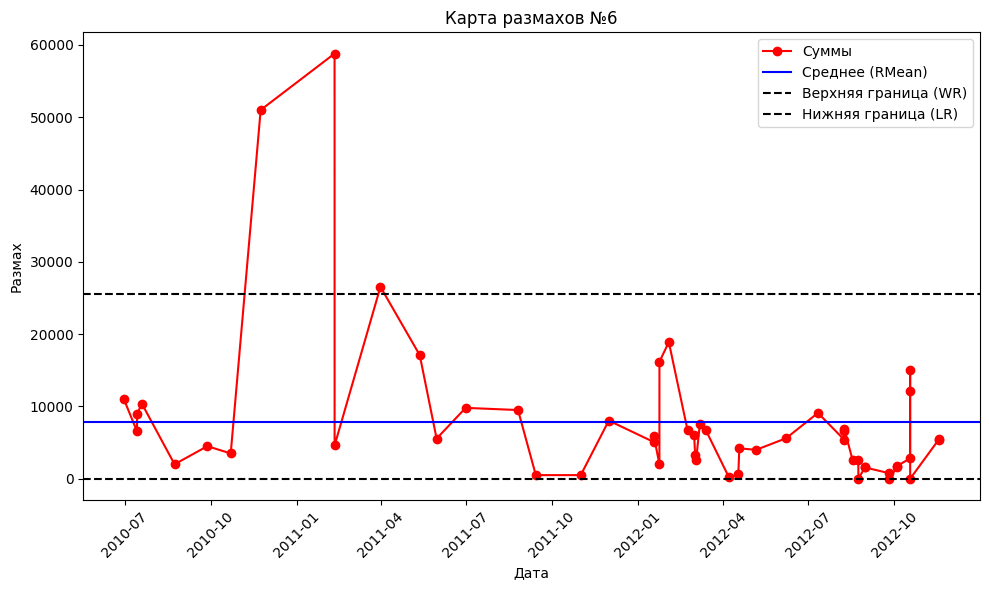

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(df6['Дата'], df6['Размах'], marker='o', linestyle='-', color='r', label='Суммы')
plt.axhline(y=RMean, color='blue', linestyle='-', label='Среднее (RMean)')
plt.axhline(y=WR, color='black', linestyle='--', label='Верхняя граница (WR)')
plt.axhline(y=LR, color='black', linestyle='--', label='Нижняя граница (LR)')

plt.title('Карта размахов №6')
plt.xlabel('Дата')
plt.ylabel('Размах')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('scope_map6.png')
plt.show()